# Introduction to programming for Geoscientists through Python
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman),  [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)
# Lecture 6: Files, strings, and dictionaries

Learning objectives: You will learn how to:

* Read data in from a file
* Parse strings to extract specific data of interest.
* Use dictionaries to index data using any type of key.

In [ ]:
from client.api.notebook import Notebook
from client.api import assignment
from client.utils import auth

args = assignment.Settings(server='okpyic.azurewebsites.net')
ok = Notebook('./lecture6.ok', args)

Assignment: Lecture 6
OK, version v1.13.11



In [ ]:
var1 = 4
var2 = 3
var3 = 3

def funct1():
    return 0

def funct2():
    return 0

In [ ]:
ok.grade('lect6-q0')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 5}

## Reading data from a plain text file
We can read text from a [text file](http://en.wikipedia.org/wiki/Text_file) into strings in a program. This is a common (and simple) way for a program to get input data. The basic recipe is:

Let's look at the file [data1.txt](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/data1.txt) (all of the data files in this lecture are stored in the sub-folder *data/* of this notebook library). The files has a column of numbers:

The goal is to read this file and calculate the mean:

In [ ]:
# Open data file
infile = open("data/data1.txt", "r")

# Initialise values
mean = 0
n=0

# Loop to perform sum
for number in infile:
    number = float(number)
    mean = mean + number
    n += 1
    
# It is good practice to close a file when you are finished. 
infile.close()

# Calculate the mean.
mean = mean/n
print(mean)

20.95


Let's make this example more interesting. There is a **lot** of data out there for you to discover all kinds of interesting facts - you just need to be interested in learning a little analysis. For this case I have downloaded tidal gauge data for the port of Avonmouth from the [BODC](http://www.bodc.ac.uk/). If you look at the header of file [data/2012AVO.txt](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/2012AVO.txt) you will see the [metadata](http://en.wikipedia.org/wiki/Metadata):

Let's read the column ASLVTD02 (the surface elevation) and plot it:

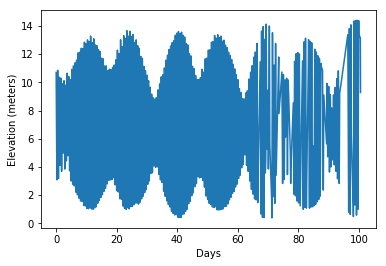

In [ ]:
from pylab import *

tide_file = open("data/2012AVO.txt", "r")

# We know from inspecting the file that the first 11 lines are just
# header information so lets just skip those lines.
for i in range(11):
    line = tide_file.readline()

# Initialise an empty list to store the elevation
elevation = []
days = []

# Now we start reading the interesting data
n=0
while True: # This will keep looping until we break out.
    # Here we use a try/except block to try to read the data as normal
    # and to break out if unsuccessful - ie when we reach the end of the file. 
    try:
        # Read the next line
        line = tide_file.readline()
        
        # Split this line into words. 
        words = line.split()
        
        # If we do not have 5 words then it must be blank lines at the end of the file.
        if len(words)!=5:
            break
    except:
        # If we failed to read a line then we must have got to the end.
        break
    
    n+=1 # Count number of data points

    try:
        # The elevation data is on the 4th column. However, the BODC
        # appends a "M" when a value is improbable and an "N" when
        # data is missing (maybe a ship dumped into it during rough weather!)
        # Therefore, we put this conversion from a string into a float in a 
        # try/except block.
        level = float(words[3])
        elevation.append(level)
        
        # There is a measurement every quarter hour.
        days.append(n*0.25/24) 
    except:
        continue
    
# For plotting lets convert the list to a NumPy array.
elevation = array(elevation)
days = array(days)

plot(days, elevation)
xlabel("Days")
ylabel("Elevation (meters)")
show()

Quiz time:

* What tidal constituents can you identify by looking at this plot?
* Is this primarily a diurnal or semi-diurnal tidal region? (hint - change the x-axis range on the plot above).

You will notice in the above example that we used the *split()* string member function. This is a very useful function for grabbing individual words on a line. When called without any arguments it assumes that the [delimiter](http://en.wikipedia.org/wiki/Delimiter) is a blank space. However, you can use this to split a string with any delimiter, *e.g.*, *line.split(';')*, *line.split(':')*.

## <span style="color:blue">Exercise 6.1: Read a two-column data file</span>
The file [data/xy.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/xy.dat) contains two columns of numbers, corresponding to *x* and *y* coordinates on a curve. The start of the file looks like this:

-1.0000   -0.0000</br>
-0.9933   -0.0087</br>
-0.9867   -0.0179</br>
-0.9800   -0.0274</br>
-0.9733   -0.0374</br>

Make a program that reads the first column into a list `xlist_61` and the second column into a list `ylist_61`. Then convert the lists to arrays named `xarray_61` and `yarray_61`, and plot the curve. Store the maximum and minimum y coordinates in two variables named `ymin_61` and `ymax_61`. (Hint: Read the file line by line, split each line into words, convert to float, and append to `xlist_61` and `ylist_61`.)</br>

In [ ]:
# Open data file
infile = open("data/xy.dat", "r") # "r" is for read

# Initialise empty lists
xlist_61 = []
ylist_61 = []

# Loop through infile and write to x and y lists
for line in infile:
    line = line.split() # convert to list by dropping spaces
    xlist_61.append(float(line[0])) # take 0th element and covert to float
    ylist_61.append(float(line[1])) # take 1st element and covert to float


# Close the filehandle
infile.close()

xarray_61 = np.array(xlist_61)
yarray_61 = np.array(ylist_61)

ymin_61 = yarray_61.min()
ymax_61 = yarray_61.max()

In [ ]:
grade = ok.grade('lect6-q1')
print("===", grade, "===")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 9
    Failed: 0
[ooooooooook] 100.0% passed

=== {'passed': 9, 'failed': 0, 'locked': 0} ===


## <span style="color:blue">Exercise 6.2: Read a data file</span>
The files [data/density_water.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/density_water.dat) and [data/density_air.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/density_air.dat) contain data about the density of water and air (respectively) for different temperatures. The data files have some comment lines starting with # and some lines are blank. The rest of the lines contain density data: the temperature in the first column and the corresponding density in the second column. The goal of this exercise is to read the data in such a file, discard commented or blank lines, and plot the density versus the temperature as distinct (small) circles for each data point. Write a function `readTempDenFile` that takes a filename as argument and returns two lists containing respectively the temperature and the density. Call this function on both files, and store the temperature and density in lists called `temp_air_list`, `dens_air_list`, `temp_water_list` and `dens_water_list`.

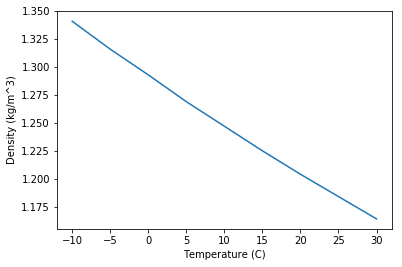

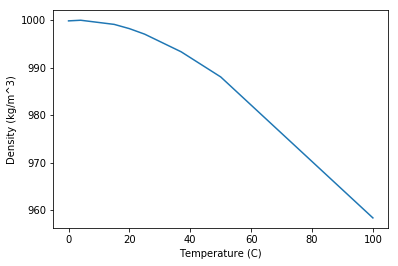

In [ ]:
def readTempDenFile(filename):
    infile = open(filename, "r")
    temp = []
    dens = []
    for line in infile:
        try:
            t, d = line.split()
            t = float(t)
            d = float(d)
        except:
            continue
        temp.append(t) # N.B. we're now filling out temp and dens lists
        dens.append(d)
    infile.close()
    plot(array(temp), array(dens))
    xlabel("Temperature (C)")
    ylabel("Density (kg/m^3)")
    show()
    return temp,dens

# run function
temp_air_list, dens_air_list = readTempDenFile("data/density_air.dat")
temp_water_list, dens_water_list = readTempDenFile("data/density_water.dat")

In [ ]:
ok.grade("lect6-q2")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests



/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'linalg', 'fft', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 6}

## <span style="color:blue">Exercise 6.3: Read acceleration data and find velocities</span>
A file [data/acc.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/acc.dat) contains measurements $a_0, a_1, \ldots, a_{n-1}$ of the acceleration of an object moving along a straight line. The measurement $a_k$ is taken at time point $t_k = k\Delta t$, where $\Delta t$ is the time spacing between the measurements. The purpose of the exercise is to load the acceleration data into a program and compute the velocity $v(t)$ of the object at some time $t$.

In general, the acceleration $a(t)$ is related to the velocity $v(t)$ through $v^\prime(t) = a(t)$. This means that

$$
v(t) = v(0) + \int_0^t{a(\tau)d\tau}
$$

If $a(t)$ is only known at some discrete, equally spaced points in time, $a_0, \ldots, a_{n-1}$ (which is the case in this exercise), we must compute the integral above numerically, for example by the Trapezoidal rule:

$$
v(t_k) \approx v(0) + \Delta t \left(\frac{1}{2}a_0 + \frac{1}{2}a_k + \sum_{i=1}^{k-1}a_i \right), \ \ 1 \leq k \leq n-1. 
$$

We assume $v(0) = 0$ so that also $v_0 = 0$.
Read the values $a_0, \ldots, a_{n-1}$ from file into an array `acc_array_63` and plot the acceleration versus time for $\Delta_t = 0.5$. The time should be stored in an array named `time_array_63`.

Then write a function `compute_velocity(dt, k, a)` that takes as arguments a time interval $\Delta_t$ `dt`, an index `k` and a list of accelerations `a`, uses the Trapezoidal rule to compute one $v(t_k)$ value and return this value. Experiment with different values of $\Delta t$ and $k$.

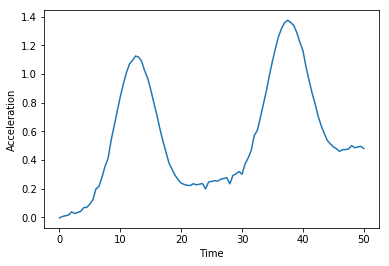

0.0820085591101
0.217477015351
62.3006966189


In [ ]:
dt = 0.5

# read in acceleration
infile = open("data/acc.dat", "r")
alist = []
for line in infile:
    alist.append(float(line))
infile.close()
acc_array_63 = array(alist)
time_array_63 = array([e*dt for e in range(len(alist))]) # time is specified by dt and the number of elements in acc.dat

#print(time_array_63, acc_array_63)

# plot
plot(time_array_63, acc_array_63)
xlabel("Time")
ylabel("Acceleration")
show()

def compute_velocity(dt, k, alist):
    if not (1 <= k <= (len(alist) - 1)):
        raise ValueError
    return dt*(.5*alist[0] + .5*alist[k] + sum(alist[:k]))

dt = 2
k = 4
print(compute_velocity(2, 4, alist))
print(compute_velocity(3, 5, alist))
print(compute_velocity(12, 21, alist))

In [ ]:
ok.grade('lect6-q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 15
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 15}

## Python dictionaries
Suppose we need to store the temperatures in Oslo, London and Paris. The Python list solution might look like:

In [ ]:
temps = [13, 15.4, 17.5]
# temps[0]: Oslo
# temps[1]: London
# temps[2]: Paris

In this case we need to remember the mapping between the index and the city name. It would be easier to specify name of city to get the temperature. Containers such as lists and arrays use a continuous series of integers to index elements. However, for many applications such an integer index is not useful.

**Dictionaries** are containers where any Python object can be used
as an index. Let's rewrite the previous example using a Python dictionary:

In [ ]:
temps = {"Oslo": 13, "London": 15.4, "Paris": 17.5}
print("The temperature in London is", temps["London"])

The temperature in London is 15.4


Add a new element to a dictionary:

In [ ]:
temps["Madrid"] = 26.0
print(temps)

{'Oslo': 13, 'London': 15.4, 'Paris': 17.5, 'Madrid': 26.0}


Loop (iterate) over a dictionary:

In [ ]:
for city in temps:
    print("The temperature in %s is %g" % (city, temps[city]))

The temperature in Oslo is 13
The temperature in London is 15.4
The temperature in Paris is 17.5
The temperature in Madrid is 26


The index in a dictionary is called the **key**. A dictionary is said to hold key–value pairs. So in general:

Does the dictionary have a particular key (*i.e.* a particular data entry)?

In [ ]:
if "Berlin" in temps:
    print("We have Berlin and its temperature is ", temps["Berlin"])
else:
    print("I don't know Berlin' termperature.")

I don't know Berlin' termperature.


In [ ]:
print("Oslo" in temps) # i.e. standard boolean expression

True


The keys and values can be reached as lists:

In [ ]:
print("Keys = ", temps.keys())
print("Values = ", temps.values())

Keys =  dict_keys(['Oslo', 'London', 'Paris', 'Madrid'])
Values =  dict_values([13, 15.4, 17.5, 26.0])


Note that the sequence of keys is **arbitrary**! Never rely on it, if you need a specific order of the keys then you should explicitly sort:

In [ ]:
for key in sorted(temps):
    value = temps[key]
    print(key, value)

London 15.4
Madrid 26.0
Oslo 13
Paris 17.5


Remove Oslo key:value:

In [ ]:
del temps["Oslo"] # remove Oslo key w/value
print(temps, len(temps))

{'London': 15.4, 'Paris': 17.5, 'Madrid': 26.0} 3


Similarly to what we saw for arrays, two variables can refer to the same dictionary:

In [ ]:
t1 = temps
t1["Stockholm"] = 10.0
print(temps)

{'London': 15.4, 'Paris': 17.5, 'Madrid': 26.0, 'Stockholm': 10.0}


So we can see that while we modified *t1*, the *temps* dictionary was also changed.

Let's look at a simple example of reading the same data from a file and putting it into a dictionary. We will be reading the file *data/deg2.dat*.

In [ ]:
infile = open("data/deg2.dat", "r")
# Start with empty dictionary
temps = {}             
for line in infile:
    # If you examine the file you will see a ':' after the city name,
    # so let's use this as the delimiter for splitting the line.
    city, temp = line.split(":") 
    temps[city] = float(temp)
infile.close()
print(temps)

{'Oslo': 21.8, 'London': 18.1, 'Berlin': 19.0, 'Paris': 23.0, 'Rome': 26.0}


## <span style="color:blue">Exercise 6.4: Make a dictionary from a table</span>
The file [data/constants.txt](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/constants.txt) contains a table of the values and the dimensions of some fundamental constants from physics. We want to load this table into a dictionary *constants*, where the keys are the names of the constants. For example, *constants['gravitational constant']* holds the value of the gravitational constant (6.67259 $\times$ 10$^{-11}$) in Newton's law of gravitation. Make a function `read_constants(file_path)`  that that reads and interprets the text in the file passed as argument, and thereafter returns the dictionary.

In [ ]:
def read_constants(file_path):
    infile = open(file_path, "r")
    constants = {} # An empty dictionary to store the constants that are read in from the file
    infile.readline(); infile.readline() # Skip the first two lines of the file, since these just contain the column names and the separator.
    for line in infile:
        words = line.split() # Split each line up into individual words
        dimension = words.pop() # pop is a list operation that removes the last element from a list and returns it
        value = float(words.pop()) # Again, use pop to obtain the constant itself.
        name = " ".join(words) # After the two 'pop' operations above, the words remaining in the 'words' list must be the name of the constant. Join the individual words together, with spaces inbetween, using .join.
        constants[name] = value # Create a new key-value pair in the dictionary
    return constants

print(read_constants('data/constants.txt'))

{'speed of light': 299792458.0, 'gravitational constant': 6.67259e-11, 'Planck constant': 6.6260755e-34, 'elementary charge': 1.60217733e-19, 'Avogadro number': 6.0221367e+23, 'Boltzmann constant': 1.380658e-23, 'electron mass': 9.1093897e-31, 'proton mass': 1.6726231e-27}


In [ ]:
ok.grade('lect6-q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

## <span style="color:blue">Exercise 6.5: Explore syntax differences: lists vs. dictionaries</span>
Consider this code:

In [ ]:
t1 = {}
t1[0] = -5
t1[1] = 10.5

Explain why the lines above work fine while the ones below do not:

In [ ]:
t2 = []
#t2[0] = -5
#t2[1] = 10.5

What must be done in the last code snippet to make it work properly?

## <span style="color:blue">Exercise 6.6: Compute the area of a triangle</span>
An arbitrary triangle can be described by the coordinates of its three vertices: $(x_1, y_1), (x_2, y_2), (x_3, y_3)$, numbered in a counterclockwise direction. The area of the triangle is given by the formula:

$A = \frac{1}{2}|x_2y_3 - x_3y_2 - x_1y_3 + x_3y_1 + x_1y_2 - x_2y_1|.$

Write a function `triangle_area(vertices)` that returns the area of a triangle whose vertices are specified by the argument vertices, which is a nested list of the vertex coordinates. For example, vertices can be [[0,0], [1,0], [0,2]] if the three corners of the triangle have coordinates (0, 0), (1, 0), and (0, 2).

Then, assume that the vertices of the triangle are stored in a dictionary and not a list. The keys in the dictionary correspond to the vertex number (1, 2, or 3) while the values are 2-tuples with the x and y coordinates of the vertex. For example, in a triangle with vertices (0, 0), (1, 0), and (0, 2) the vertices argument becomes:

In [ ]:
def triangle_area(vertices):
    # nb. vertices = {v1: (x,y)}
    x2y3 = vertices[2][0] * vertices[3][1]
    x3y2 = vertices[3][0] * vertices[2][1]
    x1y3 = vertices[1][0] * vertices[3][1]
    x3y1 = vertices[3][0] * vertices[1][1]
    x1y2 = vertices[1][0] * vertices[2][1]
    x2y1 = vertices[2][0] * vertices[1][1]
    return .5*(x2y3 - x3y2 - x1y3 + x3y1 + x1y2 - x2y1)

print(triangle_area({1: (0,0), 2: (1,0), 3: (0,1)}))

0.5


In [ ]:
ok.grade('lect6-q6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

## String manipulation
Text in Python is represented as **strings**. Programming with strings is therefore the key to interpret text in files and construct new text (*i.e.* **parsing**). First we show some common string operations and then we apply them to real examples. Our sample string used for illustration is:

In [ ]:
s = "Berlin: 18.4 C at 4 pm"

Strings behave much like lists/tuples - they are simply a sequence of characters:

In [ ]:
print("s[0] = ", s[0])
print("s[1] = ", s[1])

s[0] =  B
s[1] =  e


Substrings are just slices of lists and arrays:

In [ ]:
# from index 8 to the end of the string
print(s[8:])

18.4 C at 4 pm


In [ ]:
# index 8, 9, 10 and 11 (not 12!)
print(s[8:12])

18.4


In [ ]:
# from index 8 to 8 from the end of the string
print(s[8:-8])

18.4 C


You can also find the start of a substring:

In [ ]:
# where does "Berlin" start?
print(s.find("Berlin"))

0


In [ ]:
print(s.find("pm"))

20


In [ ]:
print (s.find("Oslo"))

-1


In this last example, Oslo does not exist in the list so the return value is -1.

We can also check if a substring is contained in a string:

In [ ]:
print ("Berlin" in s)

True


In [ ]:
print ("Oslo" in s)

False


In [ ]:
if "C" in s:
    print("C found")
else:
    print("C not found")

C found


### Search and replace
Strings also support substituting a substring by another string. In general this looks like *s.replace(s1, s2)*, which replaces string *s1* in *s* by string *s2*, *e.g.*:

In [ ]:
s = s.replace(" ", "_")
print(s)

Berlin:_18.4_C_at_4_pm


In [ ]:
s = s.replace("Berlin", "Bonn")
print(s)

Bonn:_18.4_C_at_4_pm


In [ ]:
# Replace the text before the first colon by 'London'
s = s.replace(s[:s.find(":")], "London")
print(s)

London:_18.4_C_at_4_pm


Notice that in all these examples we assign the new result back to *s*. One of the reasons we are doing this is strings are actually constant (*i.e* immutable) and therefore cannot be modified *inplace*. We **cannot** write for example:

We also encountered examples above where we used the split function to break up a line into separate substrings for a given separator (where a space is the default delimiter). Sometimes we want to split a string into lines - *i.e.* the delimiter is the [carriage return](http://en.wikipedia.org/wiki/Carriage_return). This can be surprisingly tricky because different computing platforms (*e.g.* Windows, Linux, Mac) use different characters to represent a carriage return. For example, Unix uses '\n'. Luckly Python provides a *cross platform* way of doing this so regardless of what platform created the data file, or what platform you are running Python on, it will do the *right thing*: 

In [ ]:
t = "1st line\n2nd line\n3rd line"
print ("""original t =
""", t)

original t =
 1st line
2nd line
3rd line


In [ ]:
# This works here but will give you problems if you are switching
# files between Windows and either Mac or Linux.
print (t.split("\n"))

['1st line', '2nd line', '3rd line']


In [ ]:
# Cross platform (ie better) solution
print(t.splitlines())

['1st line', '2nd line', '3rd line']


### Stripping off leading/trailing whitespace
When processing text from a file and composing new strings, we frequently need to trim leading and trailing whitespaces:

In [ ]:
s = "        text with leading and trailing spaces          \n"
print("-->%s<--"%s.strip())

-->text with leading and trailing spaces<--


In [ ]:
# left strip
print("-->%s<--"%s.lstrip())

-->text with leading and trailing spaces          
<--


In [ ]:
# right strip
print("-->%s<--"%s.rstrip())

-->        text with leading and trailing spaces<--


### join() (the opposite of split())
We can join a list of substrings to form a new string. Similarly to *split()* we put strings together with a delimiter inbetween:

In [ ]:
strings = ["Newton", "Secant", "Bisection"]
print(", ".join(strings))

Newton, Secant, Bisection


You can prove to yourself that these are inverse operations:

As an example, let's split off the first two words on a line:

In [ ]:
line = "This is a line of words separated by space"
words = line.split()
print("words = ", words)
line2 = " ".join(words[2:])
print("line2 = ", line2)

words =  ['This', 'is', 'a', 'line', 'of', 'words', 'separated', 'by', 'space']
line2 =  a line of words separated by space


## <span style="color:blue">Exercise 6.7: Improve a program</span>
The file [data/densities.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/densities.dat) contains a table of densities of various substances measured in g/cm$^3$. The following program reads the data in this file and produces a dictionary whose keys are the names of substances, and the values are the corresponding densities.

In [ ]:
def read_densities(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        words = line.split()
        density = float(words[-1])
    
        if len(words[:-1]) == 2:
            substance = words[0] + ' ' + words[1]
        else:
            substance = words[0]
        
        densities[substance] = density
    
    infile.close()
    return densities

densities = read_densities('data/densities.dat')
print(densities)

{'air': 0.0012, 'gasoline': 0.67, 'ice': 0.9, 'pure water': 1.0, 'seawater': 1.025, 'human body': 1.03, 'limestone': 2.6, 'granite': 2.7, 'iron': 7.8, 'silver': 10.5, 'mercury': 13.6, 'gold': 18.9, 'platinium': 21.4, 'Earth mean': 5.52, 'Earth core': 13.0, 'Moon': 3.3, 'Sun mean': 1.4, 'Sun core': 160.0, 'proton': 280000000000000.0}


One problem we face when implementing the program above is that the name of the substance can contain one or two words, and maybe more words in a more comprehensive table. The purpose of this exercise is to use string operations to shorten the code and make it more general. Implement the following two methods in separate functions `read_densities_join` and `read_densities_substrings`, and control that they give the same result.

1. Let *substance* consist of all the words but the last, using the join method in string objects to combine the words.
2. Observe that all the densities start in the same column file and use substrings to divide line into two parts. (Hint: Remember to strip the first part such that, e.g., the density of ice is obtained as *densities['ice']* and not *densities['ice     ']*.)

In [ ]:
def read_densities_join(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        words = line.split()
        density = float(words.pop()) # pop is a list operation that removes the last element from a list and returns it
        substance = "_".join(words) # join the remaining words with _
        densities[substance] = density
    infile.close()
    return densities

def read_densities_substrings(filename):
    infile = open(filename, 'r')
    densities = {}
    for line in infile:
        density = float(line[12:]) # column 13 onwards
        substance = line[:12] # upto coumn 12
        substance = substance.strip() # remove trailing spaces
        substance = substance.replace(" ", "_") # replace spaces with _
        densities[substance] = density
    infile.close()
    return densities

densities_join = read_densities_join('data/densities.dat')
densities_substrings = read_densities_substrings('data/densities.dat')
print(densities_join)
print(densities_substrings)

{'air': 0.0012, 'gasoline': 0.67, 'ice': 0.9, 'pure_water': 1.0, 'seawater': 1.025, 'human_body': 1.03, 'limestone': 2.6, 'granite': 2.7, 'iron': 7.8, 'silver': 10.5, 'mercury': 13.6, 'gold': 18.9, 'platinium': 21.4, 'Earth_mean': 5.52, 'Earth_core': 13.0, 'Moon': 3.3, 'Sun_mean': 1.4, 'Sun_core': 160.0, 'proton': 280000000000000.0}
{'air': 0.0012, 'gasoline': 0.67, 'ice': 0.9, 'pure_water': 1.0, 'seawater': 1.025, 'human_body': 1.03, 'limestone': 2.6, 'granite': 2.7, 'iron': 7.8, 'silver': 10.5, 'mercury': 13.6, 'gold': 18.9, 'platinium': 21.4, 'Earth_mean': 5.52, 'Earth_core': 13.0, 'Moon': 3.3, 'Sun_mean': 1.4, 'Sun_core': 160.0, 'proton': 280000000000000.0}


In [ ]:
ok.grade('lect6-q7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

## File writing
Writing a file in Python is simple. You just collect the text you want to write in one or more strings and, for each string, use a statement along the lines of

The write function does not add a newline character so you may have to do that explicitly:

That’s it! Compose the strings and write! Let's do an example. Write a nested list (table) to a file:

In [ ]:
# Let's define some table of data
data = [[ 0.75,        0.29619813, -0.29619813, -0.75      ],
        [ 0.29619813,  0.11697778, -0.11697778, -0.29619813],
        [-0.29619813, -0.11697778,  0.11697778,  0.29619813],
        [-0.75,       -0.29619813,  0.29619813,  0.75      ]]

# Open the file for writing. Notice the "w" indicates we are writing!
outfile = open("tmp_table.dat", "w")
for row in data:
    for column in row:
        outfile.write("%14.8f" % column)
    outfile.write("\n")   # ensure newline
outfile.close()

And that's it - run the above cell and take a look at the file that was generated in your Azure library clone.

## <span style="color:blue">Exercise 6.8: Write function data to a file</span>
We want to dump $x$ and $f(x)$ values to a file named function_data.dat, where the $x$ values appear in the first column and the $f(x)$ values appear in the second. Choose $n$ equally spaced $x$ values in the interval [-4, 4]. Here, the function $f(x)$ is given by:

$f(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)$

In [ ]:
from math import pi

# define our function
def f(x):
    return (1.0/sqrt(2.0*pi))*exp(-.5*x**2.0)

# let's make our x
xarray = linspace(-4.0, 4.0, 100)
fxs = f(xarray)
fxs[-1] += 1

# let's zip them up for a simple for loop when writing out
data = zip(xarray, fxs) # this combines each element into a tuple e.g. [(xarray1, fxs1), (xarray2, fxs2) ...]

# write out
outfile = open("ex8_out.dat", "w") # w is for writing!
for x,y in data:
    outfile.write("X = %.2f Y = %.2f" % (x, y))
    outfile.write("\n")   # ensure newline
outfile.close()

In [ ]:
ok.grade('lect6-q8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
question 6.8 > Suite 2 > Case 3

file_array = a = np.loadtxt("ex8_out.dat", usecols=(2, 5))
>>> np.array_equal(a[-1], [4., 0.])
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q lect6-q8 --suite 2 --case 3"
---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 1
[oooooook...] 75.0% passed



{'failed': 1, 'locked': 0, 'passed': 3}

In [ ]:
 ok.score()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scoring tests

---------------------------------------------------------------------
question 0
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.1
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


---------------------------------------------------------------------
question 6.2
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.3
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.4
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.6
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.7
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 6.8 > Suite 2 > Case 3

file_array = a = np.loadtxt("ex8_out.dat", usecols=(2, 5))
>>> np.array_equal(a[-1], [4., 0.])
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q

{'Total': 7.5}